In [1]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import wget

In [9]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'


In [10]:
filename = wget.download(url)

In [11]:
print(filename)

auto-mpg.data


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

In [42]:
df =  pd.read_csv('./auto-mpg.data', names = cols, na_values = "?",
                 comment = '\t',
                 sep = " ",
                 skipinitialspace=True)


In [183]:
data = df.copy()

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [185]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [186]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


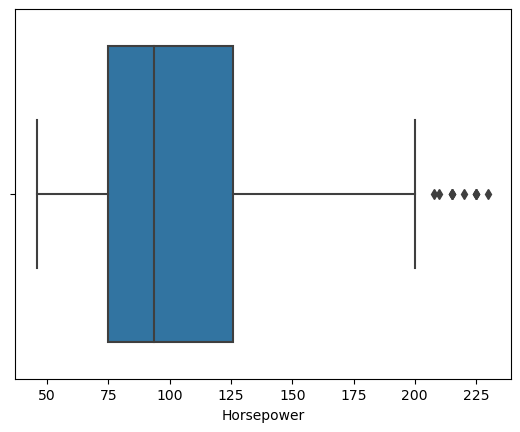

In [187]:
sns.boxplot(x = data['Horsepower'])

In [188]:
median = data['Horsepower'].median()

In [189]:
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [190]:
data['Cylinders'].value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [191]:
x = len(data)

In [192]:
data['Cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

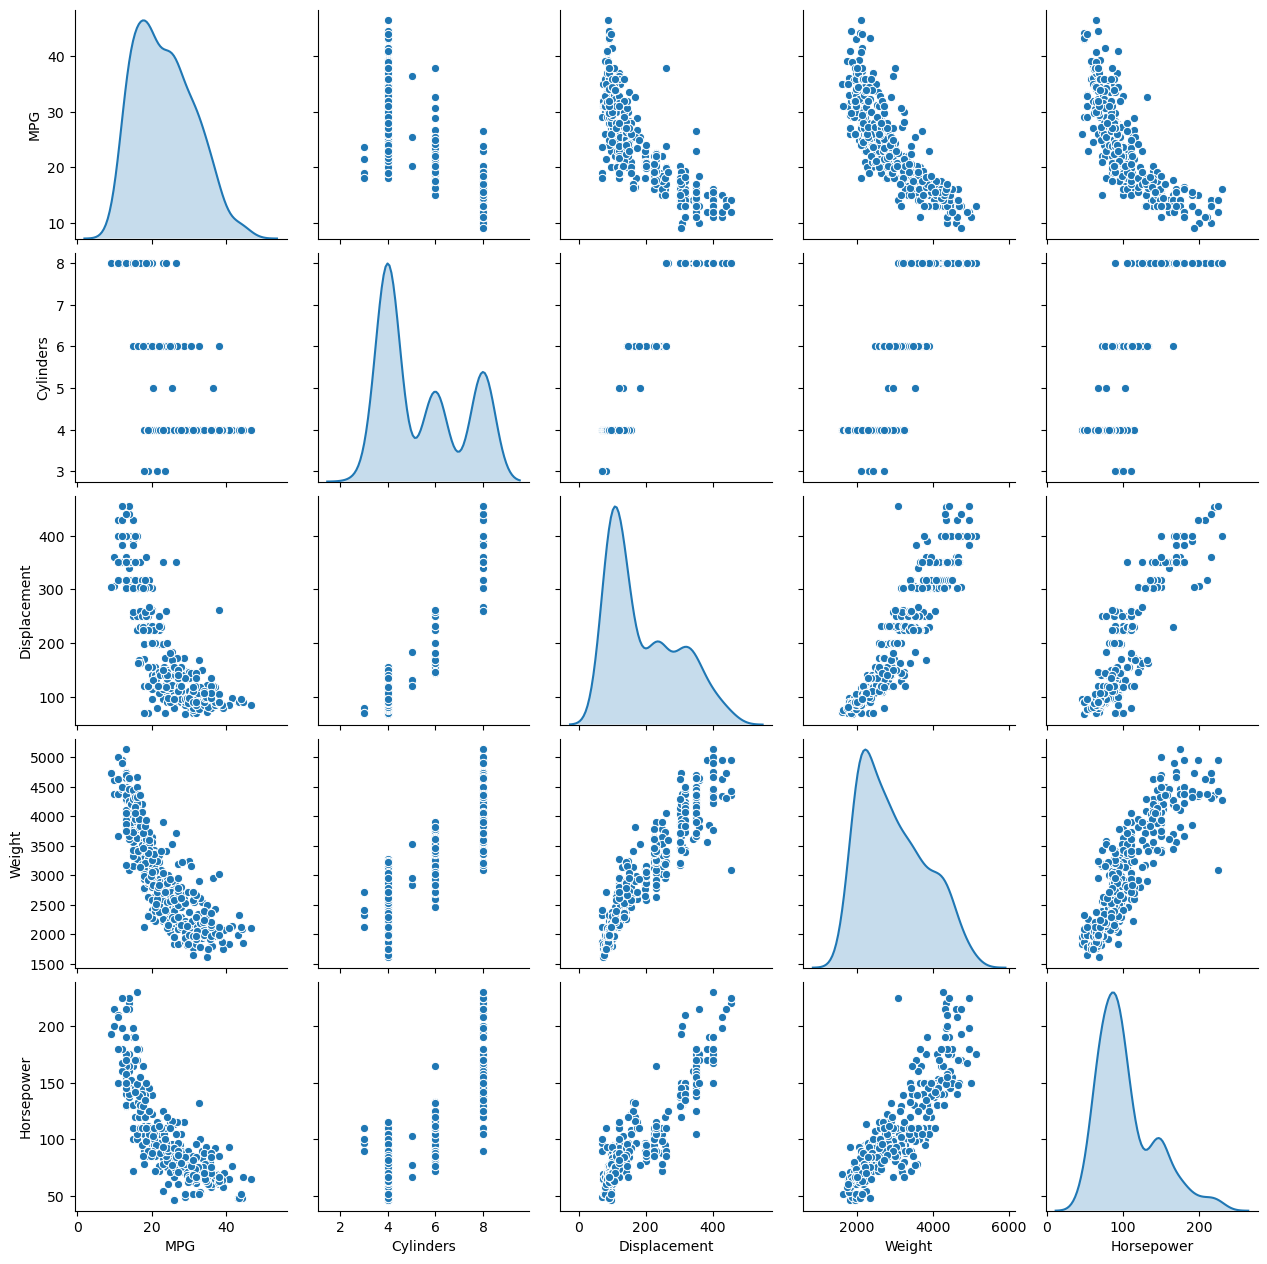

In [193]:
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind = "kde")

In [194]:
from sklearn.model_selection import StratifiedShuffleSplit


split  = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [195]:
train_set= strat_train_set
strat_train_set['Cylinders'].value_counts()

4    163
8     82
6     67
5      3
3      3
Name: Cylinders, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(data, test_size=0.2, random_state=1)
train['Cylinders'].value_counts()

4    164
8     78
6     71
3      4
5      1
Name: Cylinders, dtype: int64

In [64]:
train_set['Origin'] = train_set['Origin'].map({1: 'India', 2:'USA', 3:'Germany'})

In [65]:
train_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
84,27.0,4,97.0,88.0,2100.0,16.5,72,Germany
349,34.1,4,91.0,68.0,1985.0,16.0,81,Germany
164,21.0,6,231.0,110.0,3039.0,15.0,75,India
20,25.0,4,110.0,87.0,2672.0,17.5,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,India
280,21.5,6,231.0,115.0,3245.0,15.4,79,India
312,37.2,4,86.0,65.0,2019.0,16.4,80,Germany
256,20.5,6,225.0,100.0,3430.0,17.2,78,India
380,36.0,4,120.0,88.0,2160.0,14.5,82,Germany
282,22.3,4,140.0,88.0,2890.0,17.3,79,India


In [22]:
train_set = pd.get_dummies(train_set, prefix='', prefix_sep='')
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


In [24]:
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

In [25]:
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending = False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

In [38]:
from sklearn import preprocessing

In [39]:
cat_encoder = preprocessing.OneHotEncoder()

In [68]:
data_cat = train_set[['Origin']]
data_cat.sample()

,Origin
291,India


In [69]:
data_cat_1hot = cat_encoder.fit_transform(data_cat)

In [70]:
data_cat_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [71]:
num_data = data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']]

In [133]:
num_data.head()
data = df.copy()
data_labels = data['MPG']
data = data.drop(['MPG'], axis=1)

In [134]:
from sklearn.impute import SimpleImputer

In [135]:
imputer =  SimpleImputer(strategy="median")
imputer.fit(num_data)

SimpleImputer(strategy='median')

In [136]:
from sklearn.base import BaseEstimator, TransformerMixin

In [139]:
acc_ix, hpower_ix, cyl_ix= 4,2,0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix]/X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]
    
    
attr_adder = CustomAttrAdder(acc_on_power = True)
data_tr = data.copy()
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs

array([[8.00000000e+00, 3.07000000e+02, 1.30000000e+02, ...,
        1.00000000e+00, 9.23076923e-02, 1.50000000e+00],
       [8.00000000e+00, 3.50000000e+02, 1.65000000e+02, ...,
        1.00000000e+00, 6.96969697e-02, 1.43750000e+00],
       [8.00000000e+00, 3.18000000e+02, 1.50000000e+02, ...,
        1.00000000e+00, 7.33333333e-02, 1.37500000e+00],
       ...,
       [4.00000000e+00, 1.35000000e+02, 8.40000000e+01, ...,
        1.00000000e+00, 1.38095238e-01, 2.90000000e+00],
       [4.00000000e+00, 1.20000000e+02, 7.90000000e+01, ...,
        1.00000000e+00, 2.35443038e-01, 4.65000000e+00],
       [4.00000000e+00, 1.19000000e+02, 8.20000000e+01, ...,
        1.00000000e+00, 2.36585366e-01, 4.85000000e+00]])

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
def num_pipeline_transformer(data):
    numerics = ['float64', 'int64']
    num_attrs = data.select_dtypes(include=numerics)
    
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attr_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
    ])
    
    return num_attrs, num_pipeline

In [174]:
def pipeline_transformer(data):
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline  = num_pipeline_transformer(data)
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)), 
        ("cat", preprocessing.OneHotEncoder(), cat_attrs),
    ])
    
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [142]:
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1:"India", 2:"USA", 3:"Germany"})
    return df

In [196]:
from sklearn.compose import ColumnTransformer

X_train = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()

preprocessed_df = preprocess_origin_cols(X_train)
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.29565517,  1.        ,  0.        ,
        0.        ])

In [197]:
from sklearn.linear_model import LinearRegression



lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression()

In [198]:
preprocessed_df.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


In [199]:
print("Actual Labels of samples: ", list(sample_labels))

Actual Labels of samples:  [18.0, 15.0, 18.0, 16.0, 17.0]


In [200]:
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]
sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of Samples: ", lin_reg.predict(sample_data_prepared))

Prediction of Samples:  [31.62229874 14.02513166 22.19596111 27.9227351  23.1986911 ]


In [201]:
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9599557382767734

In [202]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
tree_reg = DecisionTreeRegressor(random_state = 0)

In [203]:
scores = cross_val_score(tree_reg,
                         prepared_data,
                         data_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)

tree_reg_rmse_scores = np.sqrt(-scores)

In [204]:
tree_reg_rmse_scores

array([3.06889638, 3.03371678, 3.31313673, 3.35940843, 2.33820177,
       2.93278878, 3.07108491, 4.53365884, 4.2848947 , 2.74296755])

In [205]:
tree_reg_rmse_scores.mean()

3.2678754859181374

In [206]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features' : [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

grid_search = GridSearchCV(forest_reg, param_grid,
                          scoring='neg_mean_squared_error',
                          return_train_score=True,
                          cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [208]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [209]:
cv_scores = grid_search.cv_results_

for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

3.511500020286647 {'max_features': 2, 'n_estimators': 3}
3.092101582674904 {'max_features': 2, 'n_estimators': 10}
2.804447199335728 {'max_features': 2, 'n_estimators': 30}
3.296938085443418 {'max_features': 4, 'n_estimators': 3}
2.935618281994552 {'max_features': 4, 'n_estimators': 10}
2.78625066189244 {'max_features': 4, 'n_estimators': 30}
3.30245457276813 {'max_features': 6, 'n_estimators': 3}
2.8648770328421516 {'max_features': 6, 'n_estimators': 10}
2.712461553499232 {'max_features': 6, 'n_estimators': 30}
3.4397310290153973 {'max_features': 8, 'n_estimators': 3}
2.852571090191579 {'max_features': 8, 'n_estimators': 10}
2.6147668915559983 {'max_features': 8, 'n_estimators': 30}
3.3892219432820228 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.051012056110604 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.335086686040562 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.781553587997762 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [210]:
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs

sorted(zip(attrs, feature_importances), reverse = True)

[('acc_on_power', 0.00203112109968023),
 ('acc_on_cyl', 0.0016313727360335911),
 ('Weight', 0.013768065748676067),
 ('Origin', 0.03272964108682967),
 ('Model Year', 0.0395610575362614),
 ('MPG', 0.17760435048180495),
 ('Horsepower', 0.23598430734220485),
 ('Displacement', 0.16454481084417175),
 ('Cylinders', 0.20675256869207922),
 ('Acceleration', 0.12384593466612395)]

In [213]:
##capturing the best configuration
final_model = grid_search.best_estimator_

##segregating the target variable from test set
X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

##preprocessing the test data origin column
X_test_preprocessed = preprocess_origin_cols(X_test)
#print(X_test_preprocessed.head())

##preparing the data with final transformation
X_test_prepared = pipeline_transformer(X_test)
#X_test_prepared[0]

##making final predictions
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [214]:
final_rmse

2.9965989054259503

In [216]:
import pickle

with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [217]:
##vehicle config
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

In [218]:
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

In [222]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_cols(df)
    print(preproc_df)
    prepared_df = pipeline_transformer(preproc_df)
    print(len(prepared_df[0]))
    y_pred = model.predict(prepared_df)
    return y_pred
predict_mpg(vehicle_config, model)

   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0          4         155.0        93.0  2500.0          15.0          81   
1          6         160.0       130.0  3150.0          14.0          80   
2          8         165.5        98.0  2600.0          16.0          78   

    Origin  
0  Germany  
1      USA  
2    India  
11


array([34.04666667, 18.44666667, 21.29333333])

In [223]:
import requests

url = "http://127.0.0.1:9696/predict"
r= requests.post(url, json = vehicle_config)
r.text.strip()

'<!doctype html>\n<html lang=en>\n  <head>\n    <title>TypeError: \'ColumnTransformer\' object is not subscriptable\n // Werkzeug Debugger</title>\n    <link rel="stylesheet" href="?__debugger__=yes&amp;cmd=resource&amp;f=style.css">\n    <link rel="shortcut icon"\n        href="?__debugger__=yes&amp;cmd=resource&amp;f=console.png">\n    <script src="?__debugger__=yes&amp;cmd=resource&amp;f=debugger.js"></script>\n    <script>\n      var CONSOLE_MODE = false,\n          EVALEX = true,\n          EVALEX_TRUSTED = false,\n          SECRET = "U6yqMr7Hzzq7LXol635d";\n    </script>\n  </head>\n  <body style="background-color: #fff">\n    <div class="debugger">\n<h1>TypeError</h1>\n<div class="detail">\n  <p class="errormsg">TypeError: &#39;ColumnTransformer&#39; object is not subscriptable\n</p>\n</div>\n<h2 class="traceback">Traceback <em>(most recent call last)</em></h2>\n<div class="traceback">\n  <h3></h3>\n  <ul><li><div class="frame" id="frame-2417369631312">\n  <h4>File <cite class="